In [49]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import array as arr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from prophet import Prophet

data_dir = Path('data')
o_values=list()
prediction= list()
m_all=list()
test_data = list()
for parquet_file in data_dir.glob('*.parquet*'):
    full_df=pd.read_parquet(parquet_file)
    bf=full_df[["BILL_DATE","PIEZAS"]]
    df=bf.groupby('BILL_DATE').PIEZAS.sum().to_frame(name = 'PIEZAS').reset_index()
    df.columns=['ds', 'y']
    train = df[df['ds']<'2020-05-01']
    test = df[df['ds']>='2020-05-01']
    test_data.append(test)
    o_values.append(df)
    m=Prophet(interval_width=0.95,daily_seasonality=True)
    #model=m.fit(df)
    model = m.fit(train)
    future=m.make_future_dataframe(periods=10,freq='D')
    forecast=m.predict(future)
    prediction.append(forecast)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [56]:
prediction_sub = prediction[0][['ds','yhat']]
prediction_sub['ds']= prediction_sub['ds'].astype(str)
#test_data = test_data[0][['ds','y']]
# eval_df = test_data.merge(prediction_sub,on=['ds'],how='left')
# eval_df['abs_error'] = abs(eval_df['y']-eval_df['yhat'])
# eval_df['daily_FA'] = 1-(eval_df['abs_error']/eval_df['y'])
# total_y = sum(eval_df['y'])
# total_error = sum(eval_df['abs_error'])
# forecast_acc = 1-(total_error/total_y)
print(test_data)

<ipython-input-56-11e5f511f890>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_sub['ds']= prediction_sub['ds'].astype(str)


KeyError: 0

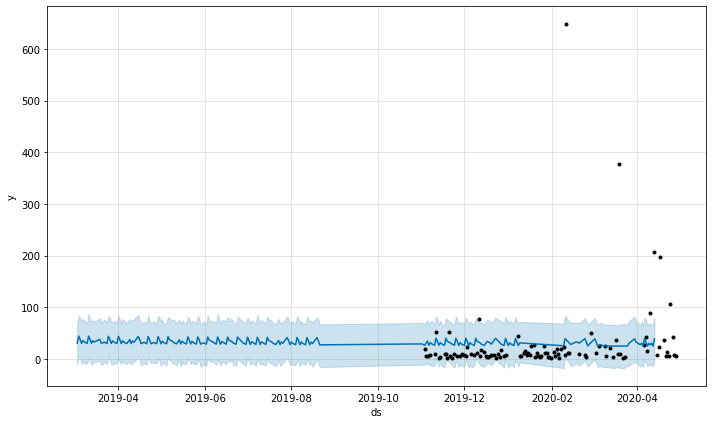

In [39]:
fig = m.plot(prediction[0])
forecast_sub

In [18]:
prediction[0].tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
222,2020-09-07,61.062021,13.381503,101.787600,61.062021,61.062021,-1.899740,-1.899740,-1.899740,-8.061707,-8.061707,-8.061707,6.161967,6.161967,6.161967,0.0,0.0,0.0,59.162281
223,2020-09-09,61.194808,9.639610,97.200452,61.194808,61.194808,-8.891775,-8.891775,-8.891775,-8.061707,-8.061707,-8.061707,-0.830068,-0.830068,-0.830068,0.0,0.0,0.0,52.303032
224,2020-09-17,61.725955,8.759932,96.863228,61.725955,61.725955,-9.367423,-9.367423,-9.367423,-8.061707,-8.061707,-8.061707,-1.305716,-1.305716,-1.305716,0.0,0.0,0.0,52.358532
225,2020-09-18,61.792348,2.581991,92.417914,61.792348,61.792348,-11.601684,-11.601684,-11.601684,-8.061707,-8.061707,-8.061707,-3.539977,-3.539977,-3.539977,0.0,0.0,0.0,50.190664
226,2020-09-19,61.858742,12.300756,99.933737,61.858261,61.858985,-7.053994,-7.053994,-7.053994,-8.061707,-8.061707,-8.061707,1.007713,1.007713,1.007713,0.0,0.0,0.0,54.804748
227,2020-09-20,61.925135,5.359947,92.411411,61.922931,61.927685,-12.871201,-12.871201,-12.871201,-8.061707,-8.061707,-8.061707,-4.809494,-4.809494,-4.809494,0.0,0.0,0.0,49.053934
228,2020-09-21,61.991529,14.091194,106.460773,61.986914,61.995698,-1.899740,-1.899740,-1.899740,-8.061707,-8.061707,-8.061707,6.161967,6.161967,6.161967,0.0,0.0,0.0,60.091789
229,2020-09-22,62.057922,13.050806,100.401996,62.050283,62.064532,-4.746134,-4.746134,-4.746134,-8.061707,-8.061707,-8.061707,3.315574,3.315574,3.315574,0.0,0.0,0.0,57.311788
230,2020-09-23,62.124315,11.173622,97.683641,62.113409,62.133616,-8.891775,-8.891775,-8.891775,-8.061707,-8.061707,-8.061707,-0.830068,-0.830068,-0.830068,0.0,0.0,0.0,53.232540
231,2020-09-24,62.190709,11.294030,97.411703,62.175826,62.203433,-9.367423,-9.367423,-9.367423,-8.061707,-8.061707,-8.061707,-1.305716,-1.305716,-1.305716,0.0,0.0,0.0,52.823286


In [30]:
temp=prediction[0].tail(10)
temp=temp[['ds','yhat']]
temp['ds'] = temp['ds'].astype(str)
temp


,ds,yhat
222,2020-09-07,59.162281
223,2020-09-09,52.303032
224,2020-09-17,52.358532
225,2020-09-18,50.190664
226,2020-09-19,54.804748
227,2020-09-20,49.053934
228,2020-09-21,60.091789
229,2020-09-22,57.311788
230,2020-09-23,53.232540
231,2020-09-24,52.823286


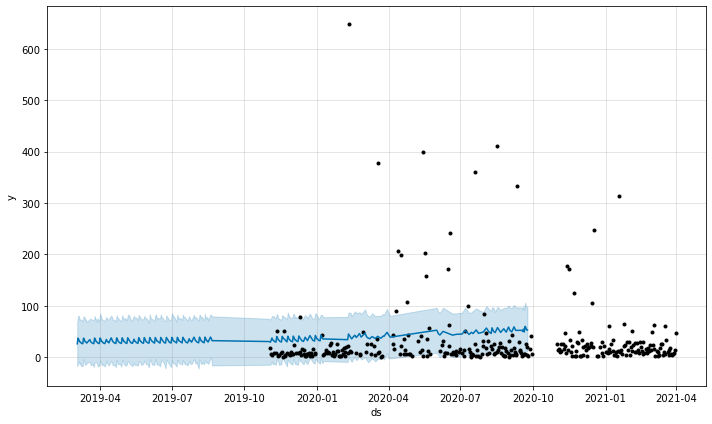

In [20]:
plot1=m.plot(prediction[0])

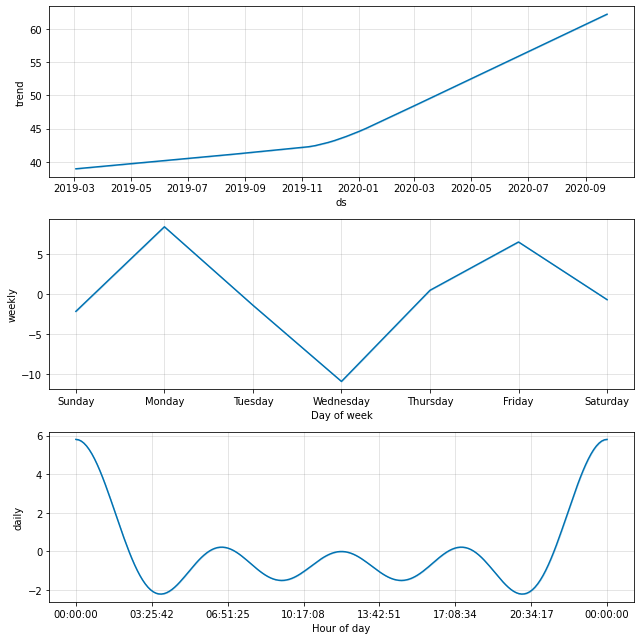

In [21]:
plot2=m.plot_components(prediction[0])

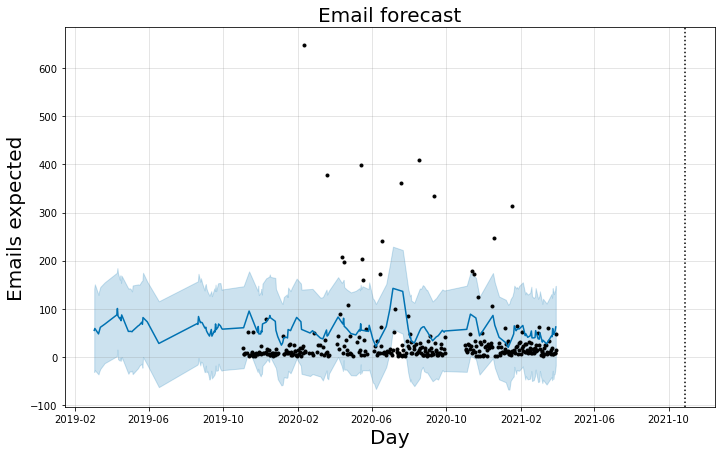

In [27]:
from datetime import datetime, timedelta
fig1 = m.plot(prediction[4])
datenow = datetime.now()
dateend = datenow + timedelta(days=7)
datestart = dateend - timedelta(days=14)

plt.title("Email forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("Emails expected", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()